###Task 1

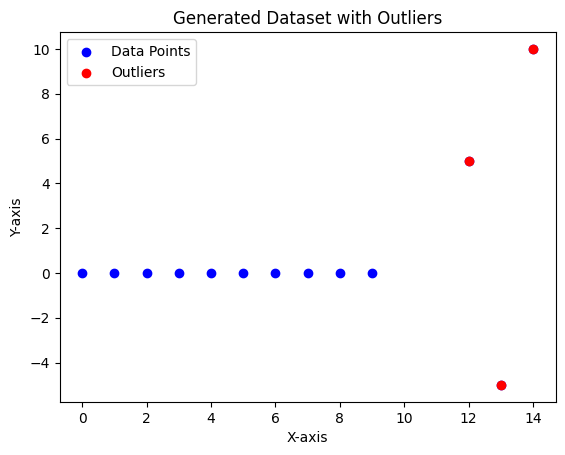

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

line_points = np.array([[i, 0] for i in range(10)])
outlier_points = np.array([[12, 5], [13, -5], [14, 10]])
dataset = np.concatenate((line_points, outlier_points), axis=0)

plt.scatter(dataset[:, 0], dataset[:, 1], color='blue', label='Data Points')
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', label='Outliers')
plt.title('Generated Dataset with Outliers')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors

def compute_cof(data, k=6):
    nbrs = NearestNeighbors(n_neighbors=k).fit(data)
    distances, indices = nbrs.kneighbors(data)
    sbn_trail = distances[:, 1:]  # exclude the distance to self
    sbn_cost = np.sum(sbn_trail, axis=1)
    avg_training_distance = np.mean(sbn_trail, axis=1)
    overall_avg_distance = np.mean(avg_training_distance)
    cof = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        if overall_avg_distance > 0:
            cof[i] = avg_training_distance[i] / overall_avg_distance
        else:
            cof[i] = 0  # Avoid division by zero
    return cof

In [ ]:
cof_values = compute_cof(dataset)
threshold = 0.9
outliers = dataset[np.where(cof_values > threshold)[0]]

print("COF Values:", cof_values)
print("Identified Outliers Indices:\n", outliers)

COF Values: [0.84393109 0.6188828  0.50635865 0.50635865 0.50635865 0.50635865
 0.50635865 0.50635865 0.6188828  0.84393109 1.82854878 2.21226679
 2.99540471]
Identified Outliers Indices:
 [[12  5]
 [13 -5]
 [14 10]]


###Task 2

In [ ]:
import pandas as pd

data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


COF Values for Credit Card Dataset: [1.58459884 0.31493179 5.85850024 ... 1.16558775 0.15574497 3.49700719]


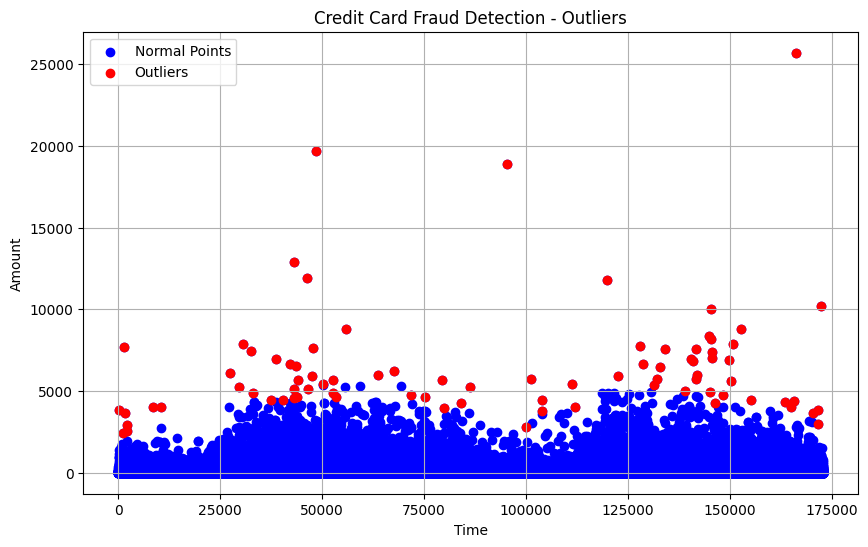

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
cof_values_credit = compute_cof(features_scaled)

threshold_credit = np.mean(cof_values_credit) + 4 * np.std(cof_values_credit)
outliers_credit = np.where(cof_values_credit > threshold_credit)[0]

print("COF Values for Credit Card Dataset:", cof_values_credit)

plt.figure(figsize=(10, 6))
plt.scatter(features[:, 0], features[:, 1], color='blue', label='Normal Points')
plt.scatter(features[outliers_credit, 0], features[outliers_credit, 1], color='red', label='Outliers')
plt.title('Credit Card Fraud Detection - Outliers')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()
plt.grid()
plt.show()

###Task 3

1. **"LOF: Identifying Density-Based Local Outliers"**\
This foundational paper by Breunig et al. (2000) introduces the Local Outlier Factor (LOF) algorithm as a method for detecting outliers in multidimensional datasets. The key contributions include:
- *Density-Based Outlier Detection:* The LOF algorithm evaluates the local density of a data point relative to its neighbors. It defines outliers as points that have a significantly lower density compared to their surrounding points.
- *Algorithm Implementation:* The authors describe a two-step process for computing LOF values, which includes materializing a database of local reachability densities and then calculating the LOF scores. The computational complexity is analyzed, demonstrating efficiency in lower-dimensional spaces.
- *Experimental Validation:* The paper presents experimental results on synthetic datasets, highlighting the algorithm's effectiveness in identifying outliers within clusters of varying densities. This work laid the groundwork for further research on density-based outlier detection methods, showing the importance of considering local density variations in identifying anomalies.


2. **"A Review of Local Outlier Factor Algorithms for Outlier Detection in Big Data Streams"**\
In this review paper by Alghushairy et al. (2020), the authors explore various adaptations of the LOF algorithm for outlier detection in big data streams. Key points include:
- *Categorization of LOF Variants*: The paper categorizes existing local outlier detection algorithms, focusing on the LOF and its modifications. It discusses the advantages and limitations of these approaches, particularly in the context of streaming data.
- *Proposed Directions for Improvement:* The authors propose several directions for enhancing local outlier detection methods, emphasizing the need for algorithms that can efficiently handle the volume and velocity of big data.
- *Applications and Case Studies:* The review highlights practical applications of LOF in fields such as network intrusion detection and fraud detection, illustrating its relevance in real-world scenarios. It provides insights into how LOF can be adapted to meet the challenges posed by dynamic and large-scale datasets.
These papers collectively underscore the significance of the LOF algorithm in outlier detection, showcasing its foundational role and adaptability in various contexts.